### 5/21. 시계열
- 시간의 흐름을 바꾸면 문제가 될 수 있음
- 시계열 데이터 섞을 수 없음
- 경향이나 추세가 보이는 시계열 데이터를 정상 시계열로 변환해야 함

- pandas의 datetime, Timestamp, Timedelta 등 사용

- datetime : date(연, 월, 일) + time(시간, 분, 초, 마이크로초)
- Timestamp : 날짜와 시간을 모두 가지고 있는 단일 객체
- Timedelta : 객체 가지고 있음, 덧셈 및 뺄셈 가능

- datetime.date : 년도, 월, 일 출력
- datetime.time : 시간, 분, 초, 마이크로초 출력
- datetime.datetime : 년도, 월, 일, 시간, 분, 초, 마이크로초 출력
- datetime.timedelta : 두 날짜의 차이 계산 가능

In [2]:
import pandas as pd
import datetime

In [4]:
date = datetime.date(year = 2023, month = 5, day = 21)
time = datetime.time(hour = 22, minute = 6, second = 5, microsecond = 1234)

In [6]:
date

datetime.date(2023, 5, 21)

In [8]:
time

datetime.time(22, 6, 5, 1234)

In [9]:
dt = datetime.datetime(year = 2023, month = 5, day = 21,
                       hour = 22, minute = 6, second = 5, microsecond = 1234)

In [10]:
dt

datetime.datetime(2023, 5, 21, 22, 6, 5, 1234)

In [11]:
td = datetime.timedelta(days = 20, hours = 10)

In [12]:
td

datetime.timedelta(days=20, seconds=36000)

In [13]:
print(date + td)
print(dt + td)

2023-06-10
2023-06-11 08:06:05.001234


- pd.to_datetime : 이용해서 시계열데이터로 변경 가능

In [14]:
pd.to_datetime('2023-5-21')

Timestamp('2023-05-21 00:00:00')

- 순서를 바꾸거나, 없는 날짜를 입력하거나 하면 Na로 나온다

In [15]:
a = pd.Series(['2023-5-26', '2/5/23', '2023-6-26', '2023-07-21', '2023-05-41'])

In [16]:
pd.to_datetime(a, dayfirst = True, errors = 'coerce')

0   2023-05-26
1   2023-05-02
2   2023-06-26
3   2023-07-21
4          NaT
dtype: datetime64[ns]

### 실제 데이터 돌려보기

In [17]:
from google.colab import files
uploaded = files.upload()

Saving crime.csv to crime.csv


In [18]:
crime = pd.read_csv('crime.csv')

1. 시계열 데이터 값 datetime으로 변경해주기
- datetime 아니면 시계열 데이터로 사용할 수 없음

In [19]:
crime.info() # 시계열인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [20]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [21]:
crime.info() # 시계열인지 재확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


- REPORTED_DATE를 시계열 데이터로 변경

2. 시계열 데이터 컬럼을 인덱스로 지정
- 다양한 메서드 사용을 위해

In [22]:
crime_dt = crime.set_index('REPORTED_DATE')

1) 해당 년 데이터 추출

In [23]:
crime_dt.loc['2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2014-01-21 07:32:00,457344,traffic-accident,traffic-accident,-104.998902,39.711204,baker,0,1
2014-05-22 10:55:00,457385,harassment-dv,public-disorder,-104.905262,39.724593,hilltop,1,0
2014-01-20 17:27:00,457769,traffic-accident,traffic-accident,-104.968227,39.739752,cheesman-park,0,1


In [24]:
crime_dt.loc['2017']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-05-22 14:41:00,7261,traffic-accident,traffic-accident,-104.673812,39.849292,dia,0,1
2017-05-17 20:35:00,7262,threats-to-injure,public-disorder,-105.020053,39.694351,ruby-hill,1,0
2017-06-07 07:47:00,7265,burglary-residence-by-force,burglary,-104.981677,39.763597,five-points,1,0
2017-05-26 16:46:00,7270,theft-other,larceny,-104.839119,39.769694,stapleton,1,0
2017-06-07 07:42:00,7272,criminal-trespassing,all-other-crimes,-104.673812,39.849292,dia,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


2) 해당 년, 월 데이터 추출

In [25]:
crime_dt.loc['2014-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-09-15 11:25:00,1216,traffic-accident,traffic-accident,-104.715414,39.835430,dia,0,1
2014-09-04 22:39:00,1229,drug-marijuana-possess,drug-alcohol,-104.987391,39.740059,civic-center,1,0
2014-09-05 16:45:00,1265,drug-methampetamine-possess,drug-alcohol,-105.015556,39.714645,valverde,1,0
2014-09-04 02:17:00,1348,criminal-trespassing,all-other-crimes,-104.987987,39.721292,baker,1,0
2014-09-02 00:48:00,1393,criminal-mischief-other,public-disorder,-105.036771,39.738809,west-colfax,1,0
...,...,...,...,...,...,...,...,...
2014-09-14 23:20:00,410763,assault-dv,other-crimes-against-persons,-104.979477,39.715978,speer,1,0
2014-09-29 11:04:00,419326,fraud-identity-theft,white-collar-crime,-105.034558,39.705673,westwood,1,0
2014-09-06 16:29:00,430458,theft-bicycle,larceny,-104.987656,39.696018,overland,1,0


In [26]:
crime_dt.loc['2017-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-17 02:13:00,89011,aggravated-assault,aggravated-assault,-104.990480,39.728076,lincoln-park,1,0
2017-09-18 13:30:00,112711,criminal-mischief-mtr-veh,public-disorder,-104.989896,39.753590,five-points,1,0
2017-09-12 15:59:00,134270,traffic-accident,traffic-accident,-104.940906,39.742085,city-park,0,1
2017-09-26 21:17:00,191519,traf-other,all-other-crimes,-105.008656,39.711201,athmar-park,1,0
2017-09-10 11:30:00,193934,aggravated-assault,aggravated-assault,-105.049447,39.700059,westwood,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


3) 해당 년, 월, 일 데이터 추출

In [27]:
crime_dt.loc['2014-09-13']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-09-13 14:26:00,1754,indecent-exposure,other-crimes-against-persons,-104.895340,39.783977,stapleton,1,0
2014-09-13 22:45:00,3044,criminal-trespassing,all-other-crimes,-104.991639,39.745233,cbd,1,0
2014-09-13 16:52:00,3566,traffic-accident,traffic-accident,-104.966873,39.739680,cheesman-park,0,1
2014-09-13 23:45:00,4832,traffic-accident-hit-and-run,traffic-accident,-104.904414,39.699266,washington-virginia-vale,0,1
2014-09-13 17:55:00,9368,traffic-accident-hit-and-run,traffic-accident,-104.997648,39.738456,lincoln-park,0,1
...,...,...,...,...,...,...,...,...
2014-09-13 11:07:00,365765,police-interference,all-other-crimes,-105.012471,39.699695,athmar-park,1,0
2014-09-13 19:30:00,367985,sex-aslt-rape,sexual-assault,NaN,NaN,montbello,1,0
2014-09-13 03:31:00,371735,false-imprisonment,all-other-crimes,-105.051087,39.710489,westwood,1,0


In [28]:
crime_dt.loc['2017-09-13']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-13 13:06:00,451665,fraud-identity-theft,white-collar-crime,-105.007308,39.788123,chaffee-park,1,0
2017-09-13 11:12:00,452119,theft-other,larceny,-104.910155,39.740532,south-park-hill,1,0
2017-09-13 16:00:00,453375,traffic-accident,traffic-accident,-104.913986,39.743406,south-park-hill,0,1
2017-09-13 11:50:00,453519,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.886145,39.738479,east-colfax,1,0
2017-09-13 13:05:00,453935,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.025060,39.678635,harvey-park,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 02:21:00,460867,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0
2017-09-13 03:21:00,460879,traffic-accident-dui-duid,traffic-accident,-105.010711,39.757385,highland,0,1
2017-09-13 02:15:00,460889,traffic-accident-hit-and-run,traffic-accident,-105.043950,39.787436,regis,0,1


4) 다른 형식으로도 년, 월, 일 추출 가능

In [29]:
crime_dt.loc['Dec 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-12-19 17:42:00,1219,traffic-accident,traffic-accident,-104.940355,39.781688,northeast-park-hill,0,1
2014-12-06 08:25:00,1225,disturbing-the-peace,public-disorder,-104.817529,39.773653,montbello,1,0
2014-12-19 08:29:00,1301,burglary-residence-no-force,burglary,-104.901114,39.729047,lowry-field,1,0
2014-12-01 22:13:00,1322,liquor-possession,drug-alcohol,-104.966870,39.738576,cheesman-park,1,0
2014-12-30 08:26:00,1341,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037817,39.771111,berkeley,1,0
...,...,...,...,...,...,...,...,...
2014-12-18 22:36:00,377801,criminal-trespassing,all-other-crimes,-104.999197,39.739042,lincoln-park,1,0
2014-12-10 19:35:00,377834,assault-simple,other-crimes-against-persons,-105.033088,39.706098,westwood,1,0
2014-12-16 13:51:00,379049,assault-simple,other-crimes-against-persons,-104.921734,39.753780,north-park-hill,1,0


In [30]:
crime_dt.loc['Nov 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-11-20 08:11:00,1226,theft-of-motor-vehicle,auto-theft,-105.029682,39.713030,barnum,1,0
2014-11-12 22:07:00,1246,vehicular-eluding-no-chase,all-other-crimes,-105.034395,39.694911,mar-lee,1,0
2014-11-02 19:32:00,1279,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.989506,39.721153,baker,1,0
2014-11-16 13:08:00,1315,traffic-accident-hit-and-run,traffic-accident,-104.876902,39.653734,hampden,0,1
2014-11-03 10:30:00,1368,burglary-residence-no-force,burglary,-105.004149,39.747378,auraria,1,0
...,...,...,...,...,...,...,...,...
2014-11-03 11:51:00,377710,aggravated-assault,aggravated-assault,-104.972747,39.757633,whittier,1,0
2014-11-22 22:54:00,377803,robbery-car-jacking,robbery,-105.027197,39.719924,barnum,1,0
2014-11-11 22:20:00,378428,sex-aslt-non-rape-pot,sexual-assault,NaN,NaN,sloan-lake,1,0


5) 추출 후 정렬하기 : sort_index() 사용

In [31]:
crime_dt.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0
2014-12-31 23:59:00,148309,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0


6) 시간 사이 데이터 추출하기 : between_time / 해당 시간 데이터 추출하기 : at_time

In [32]:
crime_dt14 = crime_dt.loc['2014'].sort_index()

In [33]:
crime_dt14.between_time('13:00', '17:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0,1
2014-01-01 13:54:00,146990,burglary-residence-no-force,burglary,-104.977279,39.694618,washington-park-west,1,0
2014-01-01 13:55:00,200314,burglary-business-by-force,burglary,-105.022611,39.792059,chaffee-park,1,0
2014-01-01 14:22:00,133765,liquor-possession,drug-alcohol,-104.973097,39.740032,capitol-hill,1,0
2014-01-01 14:28:00,137563,assault-dv,other-crimes-against-persons,-105.018501,39.782714,sunnyside,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 16:24:00,86655,traffic-accident-hit-and-run,traffic-accident,-104.991275,39.708686,baker,0,1
2014-12-31 16:29:00,176283,theft-of-motor-vehicle,auto-theft,-104.919065,39.760460,north-park-hill,1,0
2014-12-31 16:49:00,160505,failure-to-appear,all-other-crimes,-104.991248,39.709848,baker,1,0


In [34]:
crime_dt14.at_time('16:23')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-08 16:23:00,113345,burglary-residence-no-force,burglary,-104.834007,39.785101,montbello,1,0
2014-01-11 16:23:00,157036,traffic-accident,traffic-accident,-105.025065,39.693108,mar-lee,0,1
2014-01-14 16:23:00,120869,criminal-mischief-other,public-disorder,-104.894860,39.742686,east-colfax,1,0
2014-01-30 16:23:00,345187,police-false-information,all-other-crimes,-104.990073,39.743458,cbd,1,0
2014-01-30 16:23:00,344304,threats-to-injure,public-disorder,-104.990073,39.743458,cbd,1,0
...,...,...,...,...,...,...,...,...
2014-12-16 16:23:00,109742,theft-shoplift,larceny,-104.900251,39.655404,hampden,1,0
2014-12-17 16:23:00,183783,theft-of-motor-vehicle,auto-theft,-105.034214,39.708818,westwood,1,0
2014-12-18 16:23:00,231880,criminal-mischief-mtr-veh,public-disorder,-104.978621,39.751746,five-points,1,0


7) resample 함수

-------

In [35]:
crime_sp14 = crime_dt14[['IS_CRIME','IS_TRAFFIC']]
crime_sp = crime_dt14[['IS_CRIME']]

- 월별, 일별, 주별 값 계산


In [36]:
crime_spw = crime_sp.resample('W').sum()

<Axes: xlabel='REPORTED_DATE'>

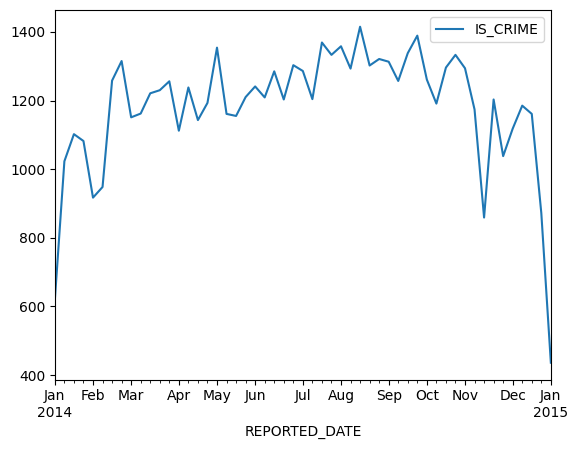

In [37]:
crime_spw.plot()

In [38]:
crime_sp14.resample('W').sum() # 주

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,619,268
2014-01-12,1023,397
2014-01-19,1102,327
2014-01-26,1082,351
2014-02-02,917,439
2014-02-09,948,481
2014-02-16,1258,394
2014-02-23,1315,358
2014-03-02,1151,404


In [39]:
crime_sp14.resample('M').sum() # 월

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-31,4557,1680
2014-02-28,4580,1646
2014-03-31,5350,1695
2014-04-30,5043,1671
2014-05-31,5401,1765
2014-06-30,5389,1789
2014-07-31,5731,1862
2014-08-31,5921,1899
2014-09-30,5690,1973


In [40]:
crime_sp14.resample('Y').sum() # 년

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,62690,21763


### 시계열 데이터 분석 이론 정리

- 과거 데이터에서 패턴을 학습하여 미래를 예측하는 것
- 과거 데이터의 패턴이 변화 없고 안정성 있어야 미래 예측 용이
- 과거 데이터의 추세, 계절, 다양한 원인들을 제거하고 정상시계열로 만들어야 함
- 단기 예측에 적합
- 다양한 요인 발생 시 오차가 발생할 수 밖에 없음

- AR : 자기회귀모형
- MA : 이동평균모형
- ARIMA : AR + MA + 차분 기본 모델
- SARIMA : 정상 시계열 + 계절성 요인, 추세 ...

- prophet 통해 쉽게 시계열 데이터 분석 가능 (made by facebook)
- 차분, 통계적인 검정 자동 진행

In [ ]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

# import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io

# to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error